In [1]:
import procanCorke as pc
'''
DH = [[0, 0, -0.1160, 0],    #i1 - base
    [0, 90*math.pi/180, 0, 0.0294],   #i2 - i1
    [180*math.pi/180, 180*math.pi/180, 0.23, 0], #i3 - i2
    [-90*math.pi/180, 90*math.pi/180, 0.08173, -0.00286], #i4 - i3 (multiplicar Z, depois X)
    [180*math.pi/180, 90*math.pi/180, 0.0019, -0.0904],  #i5 - i4
    [-90*math.pi/180, -90*math.pi/180, 0.0438, 0],     #i6 - i5
    #[-180*math.pi/180, -90*math.pi/180, 0.0438, 0],
    [0., 0., 0., 0.]]
'''

DHRobot: PROCaN, 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬──────────┬─────────┬────────┐
│θⱼ  │    dⱼ    │   aⱼ    │   ⍺ⱼ   │
├────┼──────────┼─────────┼────────┤
│ q1 │   0.0294 │       0 │  90.0° │
│ q2 │        0 │    0.23 │   0.0° │
│ q3 │ -0.00286 │ 0.08173 │ -90.0° │
│ q4 │  -0.0904 │  0.0019 │  90.0° │
│ q5 │        0 │  0.0438 │ -90.0° │
│ q6 │        0 │       0 │   0.0° │
└────┴──────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘



'\nDH = [[0, 0, -0.1160, 0],    #i1 - base\n    [0, 90*math.pi/180, 0, 0.0294],   #i2 - i1\n    [180*math.pi/180, 180*math.pi/180, 0.23, 0], #i3 - i2\n    [-90*math.pi/180, 90*math.pi/180, 0.08173, -0.00286], #i4 - i3 (multiplicar Z, depois X)\n    [180*math.pi/180, 90*math.pi/180, 0.0019, -0.0904],  #i5 - i4\n    [-90*math.pi/180, -90*math.pi/180, 0.0438, 0],     #i6 - i5\n    #[-180*math.pi/180, -90*math.pi/180, 0.0438, 0],\n    [0., 0., 0., 0.]]\n'

In [3]:
import math
pi = math.pi
#pc.T_func(0,0,pi,-pi/2,pi)#,-pi/2)    #d*Rz*a*Rx (começa a contar da base)

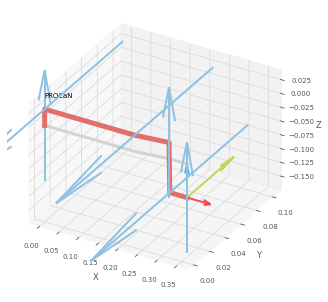

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [19]:
q = [0,0,pi,-pi/2,pi,-pi/2]
qr = [0,0,pi/2,0,0,0]
qz = [0,0,0,0,0,0]
pc.robot.plot(qz)

In [ ]:
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
pc.T_func(0,0,0,pi)#,pi,-pi/2)@Pa

In [1]:
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import SE3

puma = rtb.models.DH.Puma560(symbolic=True)

In [2]:
print(puma)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬───────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │  ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼───────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  pi/2 │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │     0 │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -pi/2 │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  pi/2 │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -pi/2 │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │     0 │ -266.0° │ 266.0° │
└────┴────────┴────────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────────────────────┬───────────────────────┬─────┬──────────────────────┬─────┐
│name │ q0  │ q1                   │ q2                    │ q3  │ q4                   │ q5  │
├─────┼─────┼──────────────────────┼───────────────────────┼─────┼──────────────────────┼─────┤
│  qr │  0° │ 28.6478897565412*pi° │ -28.6478897565412*pi° │  0° │  0°          

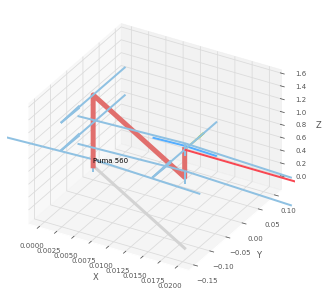

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 432x288 with 0 Axes>

In [3]:
puma.plot(puma.qr)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [ ]:
puma.plot(puma.qz)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [9]:
pumaET = rtb.models.ETS.Puma560
pumaET.plot([0,0,0,0,0,0])

TypeError: plot() missing 1 required positional argument: 'q'

In [13]:
import roboticstoolbox as rtb

robot = rtb.models.DH.Panda()  # create a robot

pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.add(robot)              # add the robot to the backend
robot.q = robot.qz             # set the robot configuration
pyplot.step()                  # update the backend and graphical view

AttributeError: 'PyPlot' object has no attribute 'ax'